### 라이브러리 임포트

In [1]:
#!pip install koreanize_matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

### 데이터 불러오기

In [3]:
# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [4]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


### 📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [5]:
# "연령대코드(5세단위)"에서 값의 개수 확인하기
df['연령대코드(5세단위)'].value_counts().sort_index()

5      23255
6      64958
7      77665
8      84691
9     130931
10    118368
11    129849
12    112183
13    106507
14     53627
15     51588
16     25986
17     16228
18      4164
Name: 연령대코드(5세단위), dtype: int64

In [6]:
# agg_code를 활용하여 "연령대" 컬럼을 생성한다.
agg_code = {1: '0~4세', 2: '5~9세', 3: '10~14세', 4: '15~19세', 5: '20~24세', 6: '25~29세',
            7: '30~34세', 8: '35~39세', 9: '40~44세', 10: '45~49세', 11: '50~54세', 12: '55~59세',
            13: '60~64세', 14: '65~69세', 15: '70~74세', 16: '75~79세', 17: '80~84세', 18: '85세+'}

df['연령대'] = df['연령대코드(5세단위)'].replace(to_replace=agg_code)

In [7]:
# 새로운 컬럼을 기준으로 "허리둘레"의 기술통계를 확인한다.
df.groupby(by='연령대')['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


### 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.
- 다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

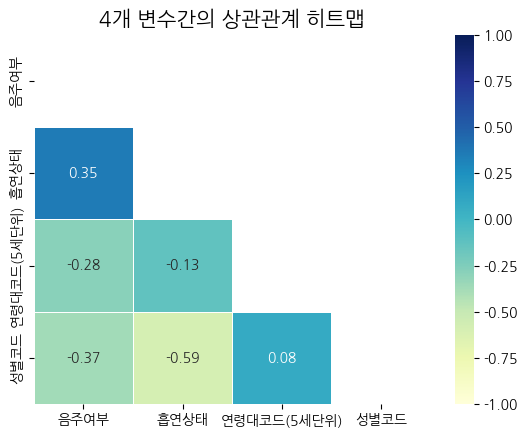

In [60]:
# 데이터프레임에서 상관관계 행렬 추출
df_corr = df[['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']].corr()

# 히트맵의 아랫부분을 가리기 위한 mask 생성
mask = np.triu(np.ones_like(df_corr, dtype=np.bool_))

plt.title('4개 변수간의 상관관계 히트맵', fontsize=15)

sns.heatmap(df_corr, vmax=1, vmin=-1, annot=True, fmt='.2f', cmap='YlGnBu', linewidth=0.5, mask=mask)
plt.show()

### 📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?
- 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [62]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [63]:
df['흡연상태'] = df['흡연상태'].replace(to_replace=smoke)
df['음주여부'] = df['음주여부'].replace(to_replace=drink)

df[['흡연상태', '음주여부']]

,흡연상태,음주여부
0,흡연중,안마심
1,흡연안함,안마심
2,흡연안함,안마심
3,흡연안함,마심
4,흡연중,안마심
...,...,...
999995,흡연안함,마심
999996,흡연안함,안마심
999997,흡연안함,안마심
999998,끊음,마심


In [71]:
df.groupby(by='음주여부')['흡연상태'].value_counts()

음주여부  흡연상태
마심    흡연안함    213743
      흡연중     162166
      끊음      120779
안마심   흡연안함    394503
      끊음       55334
      흡연중      52845
Name: 흡연상태, dtype: int64

In [78]:
# 막대그래프 시각화
sns.barplot(data=)
plt.show()

ValueError: Could not interpret input '흡연상태'

### 📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!
- 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

### 📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!
- 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.
- 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!
- 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)
- 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.